# Diabetese Prediction 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data file 
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.shape

(768, 9)

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
## There is some misconception as Glucose, BP, SkinThickness , Insulin, BMI cant be zero ,
## Replace these value with the mean of that column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())

<AxesSubplot:>

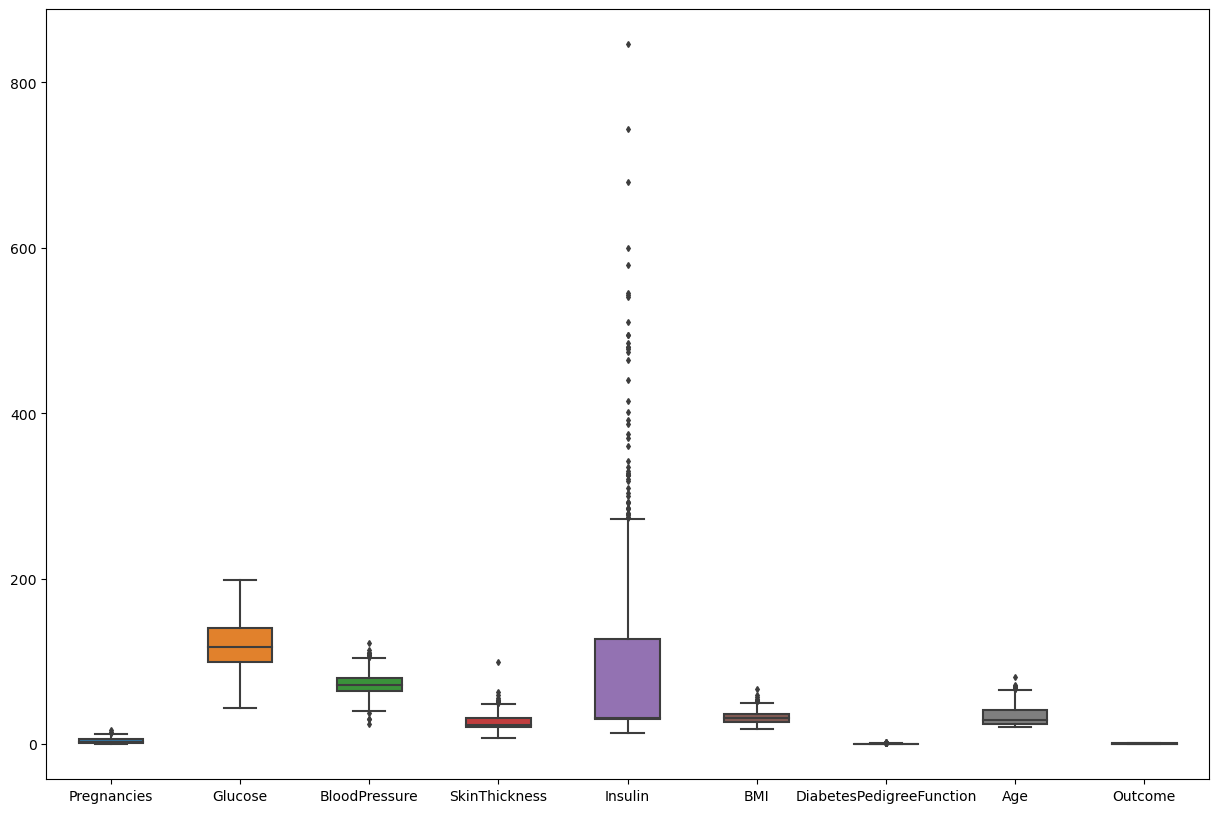

In [10]:
## Now check for the outlier in the data
fig , ax = plt.subplots(figsize=(15,10))
sns.boxplot(data= data, width=0.5,ax=ax,fliersize=3)

In [39]:
## Segregate the dependent and independent feature
X = data.drop(columns='Outcome')
y = data['Outcome']

In [40]:
# Seperate the data set into train and test split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape , X_test.shape

((576, 8), (192, 8))

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [45]:
import pickle

In [46]:
def scalar_standard(X_train,X_test):
    # Standard Scaling i.e standardization
    # Scaling the data
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    X_test_scaled = scalar.transform(X_test)
    
    # Saving the model 
    file = open("scalar.pkl",'wb')
    pickle.dump(scalar,file)
    file.close()
    
    return X_train_scaled,X_test_scaled

In [47]:
X_train_scaled, X_test_scaled = scalar_standard(X_train,X_test)

In [48]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 661 to 463
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               192 non-null    int64  
 1   Glucose                   192 non-null    float64
 2   BloodPressure             192 non-null    float64
 3   SkinThickness             192 non-null    float64
 4   Insulin                   192 non-null    float64
 5   BMI                       192 non-null    float64
 6   DiabetesPedigreeFunction  192 non-null    float64
 7   Age                       192 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 13.5 KB


# Decision tree model training with hyperparameter tuning

In [18]:
import warnings 
warnings.filterwarnings('ignore')

In [24]:
parameter = { 'criterion': ['gini','entropy','log_loss'],
             'splitter' :['best','random'],
             'max_depth' : [1,2,3,4,5],
             'max_features': ['auto','sqrt','log2']
}

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [28]:
clf = GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy',verbose = 3)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.652 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.621 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitte

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [29]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [31]:
classifier= DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 5,
 max_features = 'log2',
 splitter = 'best')

In [44]:
classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2')

In [53]:
y_pred = classifier.predict(X_test_scaled)

In [55]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[105  23]
 [ 25  39]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       128
           1       0.63      0.61      0.62        64

    accuracy                           0.75       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.75      0.75      0.75       192

0.75


In [56]:
## Suppoet Vector Classifier

In [58]:
# Defining parameter range
param_grid = {'C' :[0.1,1,10],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel':['linear','rbf','polynomial']
}

In [60]:
from sklearn.svm import SVC
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=3,verbose=3,scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.760 total time=   0.4s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.2s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.760 total time=   0.2s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.2s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [61]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [62]:
svc_clf = SVC(C= 10, gamma= 1, kernel= 'linear')
svc_clf.fit(X_train,y_train)

SVC(C=10, gamma=1, kernel='linear')

In [64]:
y_pred = svc_clf.predict(X_test)

In [65]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[117  26]
 [ 13  36]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       143
           1       0.58      0.73      0.65        49

    accuracy                           0.80       192
   macro avg       0.74      0.78      0.75       192
weighted avg       0.82      0.80      0.80       192

0.796875


In [66]:
import pickle
file = open("Diabetese_prediction_azure_model",'wb')
pickle.dump(svc_clf,file)
file.close()

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
LR_clf = LogisticRegression()

In [69]:
LR_clf.fit(X_train,y_train)

LogisticRegression()

In [70]:
y_pred = LR_clf.predict(X_test)

In [71]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[118  23]
 [ 12  39]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       141
           1       0.63      0.76      0.69        51

    accuracy                           0.82       192
   macro avg       0.77      0.80      0.78       192
weighted avg       0.83      0.82      0.82       192

0.8177083333333334


In [72]:
import pickle
file = open("Diabetese_prediction_azure_model",'wb')
pickle.dump(LR_clf,file)
file.close()